### CNN 구조 변경

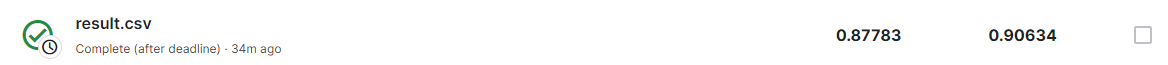

In [8]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

### 이미지 전처리

In [9]:

"./plant-pathology-2020-fgvc7/images/"

IMAGE_PATH = "./plant-pathology-2020-fgvc7/images/"
TEST_PATH = "./plant-pathology-2020-fgvc7/test.csv"
TRAIN_PATH = "./plant-pathology-2020-fgvc7/train.csv"
SUB_PATH = "./plant-pathology-2020-fgvc7/sample_submission.csv"

test_data = pd.read_csv(TEST_PATH)
train_data = pd.read_csv(TRAIN_PATH)

def load_image(image_id):
    file_path = image_id + ".jpg"
    image = cv2.imread(IMAGE_PATH + file_path)
    
    # 이미지 크기 확인
    height, width, _ = image.shape
    
    # 이미지 크기가 (2048, 1365)일 경우 회전하여 크기 변경
    if height == 2048 and width == 1365:
        image = np.rot90(image)

    # 이미지를 1/4 크기로 줄이기
    image = cv2.resize(image, (224, 224))
    
    image = image.astype('float32')/255

    return image

    #return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

train_images = train_data["image_id"][:].apply(load_image)



In [10]:
train_images = np.stack(train_images)

In [11]:
labels = train_data[["healthy", "multiple_diseases", "rust", "scab"]].values

In [13]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
"""
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), input_shape=(512,341,3), activation='relu'))
#model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(4,4)))
#model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
#model.add(Dropout(0.25))
#model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
#model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
"""

"\nmodel = Sequential()\nmodel.add(Conv2D(16, kernel_size=(3,3), input_shape=(512,341,3), activation='relu'))\n#model.add(Dropout(0.25))\nmodel.add(MaxPooling2D(pool_size=(4,4)))\n#model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))\n#model.add(Dropout(0.25))\n#model.add(MaxPooling2D(pool_size=(4,4)))\nmodel.add(Flatten())\n#model.add(Dropout(0.25))\nmodel.add(Dense(32, activation='relu'))\n#model.add(Dropout(0.1))\nmodel.add(Dense(16, activation='relu'))\n#model.add(Dropout(0.1))\nmodel.add(Dense(4, activation='softmax'))\n\nmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\n"

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 53, 53, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)        

In [16]:
modelpath = './test.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='loss', patience=10)



#history = None
#import tensorflow as tf
#with tf.device("/device:GPU:1")
history=model.fit(train_images, labels, epochs=70, batch_size=5, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/70
365/365 [==============================] - ETA: 0s - loss: 1.2545 - accuracy: 0.3432
Epoch 1: loss improved from inf to 1.25450, saving model to .\test.hdf5
365/365 [==============================] - 43s 4ms/step - loss: 1.2545 - accuracy: 0.3432
Epoch 2/70
356/365 [============================>.] - ETA: 0s - loss: 1.2363 - accuracy: 0.3702
Epoch 2: loss improved from 1.25450 to 1.23602, saving model to .\test.hdf5
365/365 [==============================] - 1s 4ms/step - loss: 1.2360 - accuracy: 0.3707
Epoch 3/70
359/365 [============================>.] - ETA: 0s - loss: 1.1985 - accuracy: 0.4329
Epoch 3: loss improved from 1.23602 to 1.19810, saving model to .\test.hdf5
365/365 [==============================] - 1s 4ms/step - loss: 1.1981 - accuracy: 0.4322
Epoch 4/70
358/365 [============================>.] - ETA: 0s - loss: 1.1370 - accuracy: 0.4939
Epoch 4: loss improved from 1.19810 to 1.13642, saving model to .\test.hdf5
365/365 [==============================] - 1s 4m

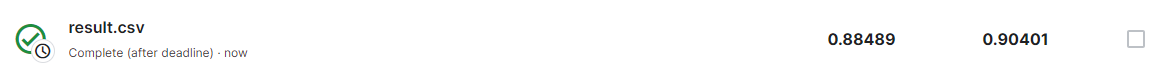

In [23]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

# 데이터를 균등하게 분할하여 검증 세트를 생성
train_images, val_images, train_labels, val_labels = train_test_split(train_images, labels, test_size=0.2, stratify=labels)

# 학습에 사용할 데이터셋 준비
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(len(train_images)).batch(5)

# 검증에 사용할 데이터셋 준비
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(5)

# 학습 및 검증
modelpath = './test.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, epochs=70, verbose=1, callbacks=[early_stopping_callback, checkpointer], validation_data=val_dataset)

Epoch 1/70
291/292 [============================>.] - ETA: 0s - loss: 0.0161 - accuracy: 0.9945
Epoch 1: val_loss improved from inf to 0.01987, saving model to .\test.hdf5
292/292 [==============================] - 10s 35ms/step - loss: 0.0161 - accuracy: 0.9945 - val_loss: 0.0199 - val_accuracy: 0.9918
Epoch 2/70
290/292 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9993
Epoch 2: val_loss improved from 0.01987 to 0.01124, saving model to .\test.hdf5
292/292 [==============================] - 10s 34ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0112 - val_accuracy: 0.9945
Epoch 3/70
291/292 [============================>.] - ETA: 0s - loss: 0.0522 - accuracy: 0.9794
Epoch 3: val_loss did not improve from 0.01124
292/292 [==============================] - 10s 34ms/step - loss: 0.0521 - accuracy: 0.9794 - val_loss: 0.3573 - val_accuracy: 0.9205
Epoch 4/70
291/292 [============================>.] - ETA: 0s - loss: 0.0446 - accuracy: 0.9835
Epoch 4: val_l